In [1]:
import os
import pandas as pd
import csv

In [2]:
def load_csv_file(file_path):
    data = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        for row in csv_reader:
            data.append(row)

    return data

In [17]:
folder_name = "congestion"
file_name = "congestion.csv"
file_path = os.path.join(folder_name, file_name)
file_path

'congestion\\congestion.csv'

In [23]:
congestion_data_df = pd.read_csv(file_path)
congestion_data_df

,YT Num,Job Num,alpha1,alpha2,alpha3,Process Time of YC per container,Process Time of QC per container,Average of Congestion ratio
0,10,10,0,0,100,150s,150s,0.067422
1,20,20,0,0,100,150s,150s,0.137432
2,30,30,0,0,100,150s,150s,0.312250
3,40,40,0,0,100,150s,150s,0.334690
4,50,50,0,0,100,150s,150s,0.745305
5,60,60,0,0,100,150s,150s,0.738816
6,70,70,0,0,100,150s,150s,NaN
7,10,20,0,0,100,150s,150s,NaN
8,20,25,0,0,100,150s,150s,NaN
9,30,40,0,0,100,150s,150s,NaN


In [28]:
test_data = congestion_data_df[:6]
test_data

,YT Num,Job Num,alpha1,alpha2,alpha3,Process Time of YC per container,Process Time of QC per container,Average of Congestion ratio
0,10,10,0,0,100,150s,150s,0.067422
1,20,20,0,0,100,150s,150s,0.137432
2,30,30,0,0,100,150s,150s,0.312250
3,40,40,0,0,100,150s,150s,0.334690
4,50,50,0,0,100,150s,150s,0.745305
5,60,60,0,0,100,150s,150s,0.738816


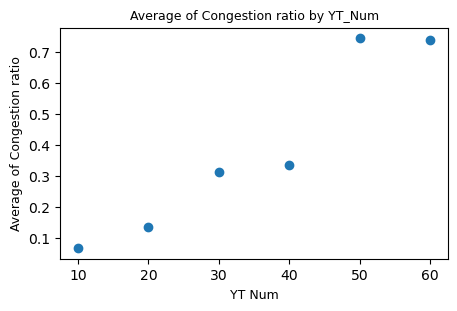

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.scatter(test_data['YT Num'], test_data['Average of Congestion ratio'])
plt.title('Average of Congestion ratio by YT_Num', fontsize=9, ha='center')
plt.xlabel('YT Num', fontsize = 9)
plt.ylabel('Average of Congestion ratio', fontsize = 9)
plt.show()